<a href="https://www.kaggle.com/code/emrahuzumer/exploring-salary-trends-in-data-science-careers?scriptVersionId=206106242" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

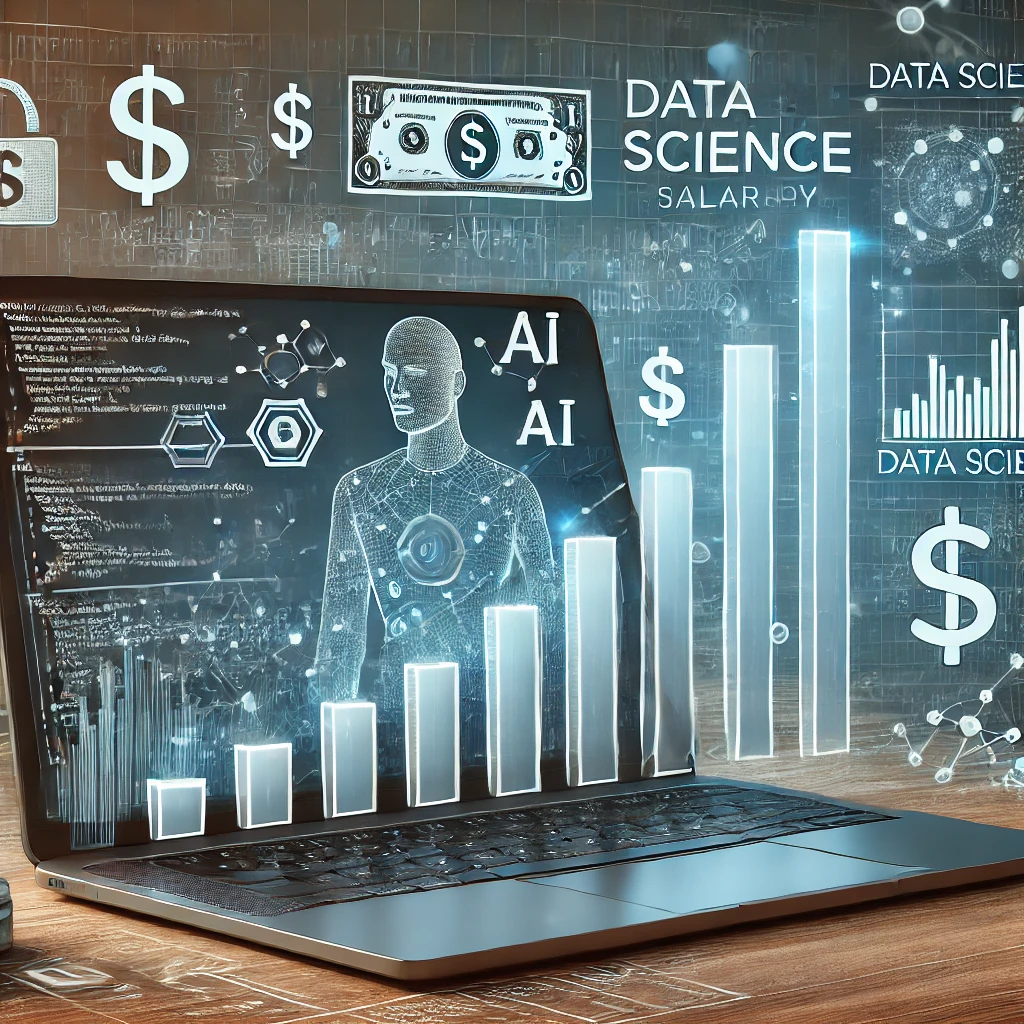

# **Jobs in Data Science Analysis**

- Welcome to the Jobs in Data Science Analysis project!

- In this analysis, we delve into the world of data science jobs to gain insights into the factors that influence employment in this field.

- Whether you're a seasoned data scientist looking to benchmark your earnings or someone considering a career in data science, this analysis aims to provide valuable insights into employment trends.

## **Dataset**

- The dataset used in this analysis comprises anonymized data on jobs in data science collected from various sources, including surveys, job postings, and public records.

- This dataset can be utilized for analyzing salary trends and variations in data science jobs over time and across different demographics.

- It can aid in benchmarking salaries, understanding the impact of factors such as experience level and company size on compensation, and informing career decisions in the data science field.

## **Column Description**

| Column Name         | Description                                                           |
|---------------------|-----------------------------------------------------------------------|
| work_year           | The year the data related to the job salary was collected.            |
| experience_level    | The employee's experience level (e.g., Junior, Mid-Level).            |
| employment_type     | The type of employment (e.g., Full-Time, Part-Time).                  |
| job_title           | The employee's title or role within the data science field.           |
| salary              | The employee's salary.                                                |
| salary_currency     | The currency in which the salary is denoted.                          |
| salary_in_usd       | The salary converted to US dollars for standardization.               |
| employee_residence  | The employee's residence location.                                    |
| remote_ratio        | The ratio of remote work allowed for the position.                    |
| company_location    | The location of the company.                                          |
| company_size        | The size of the company based on employee count or revenue.           |

<br/>

## **Analysis Overview**

- This notebook provides a structured approach to handling data cleaning, exploratory data analysis (EDA), and data visualization tasks using the provided dataset.

- Each step will cover various aspects of cleaning, analyzing, and visualizing the dataset.

- Our analysis will be divided into several key sections:

<br/>

- ### **Step 1:**  Import Libraries, Loading the Dataset

- ### **Step 2:** Initial Exploration and Analyzing Values

- ### **Step 3:** Organizing & Manipulating Data

- ### **Step 4:** Detecting and Handling Outliers

- ### **Step 5:** Data Visualization

- ### **Step 6:** Conclusion - Key Insights and Summary


<div style="
    color: white;
    display: block;
    border-radius: 15px;
    background-color: #003366;
    font-size: 100%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(300px, 100%, 1300px);
    margin: 0px;
">
    <h1 style="
        padding: clamp(15px, 4vw, 20px);
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        Step 1: Import Libraries, Loading the Dataset
    </h1>
</div>


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 600px);
    margin: 0px;
">
    <h1 style="
        padding: clamp(9px, 4vw, 12px);
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        1.1. Import Libraries & Configure Settings
    </h1>
</div>

In [1]:
# Import Libraries & Configure Settings

# Install
!pip install skimpy

# Data Visualization Libraries
import numpy as np  # Used for numerical computations and data manipulation.
import pandas as pd  # Used for data analysis and handling data structures (DataFrame, Series).
import matplotlib as mpl
import matplotlib.pyplot as plt  # Core library for 2D plotting and data visualization.
from matplotlib.patches import FancyBboxPatch  # Used for drawing box visuals.
import seaborn as sns  # Used for statistical data visualization, built on top of Matplotlib.
import plotly.express as px  # Used for interactive charts and data visualization.
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from skimpy import skim  # Used for quick summarization and inspection of data.
import statsmodels.api as sm  # Used for statistical analysis and modeling.
from wordcloud import WordCloud  # Used for creating word clouds.
import nltk  # Natural Language Toolkit: Used when creating word clouds.
from sklearn.preprocessing import LabelEncoder  # Used when creating HeatMaps.
import plotly.io as pio
pio.renderers.default = 'notebook'
import os

# Styling & Settings
%matplotlib inline 
# Ensures Matplotlib charts are displayed directly within the notebook cell.
sns.set_theme(style="dark")
#mpl.rcParams['axes.unicode_minus'] = False  # Configures how the minus sign appears on axes in Matplotlib plots.
#plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')
# Modify Pandas display settings:
pd.set_option('display.float_format', '{:.0f}'.format)  # Sets the decimal precision for numbers.
pd.set_option('display.max_columns', None)  # Ensures all columns are displayed.
pd.set_option('display.max_rows', None)  # Ensures all rows are displayed.
#pd.set_option('display.width', 500)
#pd.set_option('display.max_colwidth', None)  # Ensures the full content of all columns is displayed.

# Warnings Setting
import warnings  # Used to control and manage warning messages.
warnings.filterwarnings("ignore")  # Suppresses warning messages.
warnings.warn("this will not show")  # Example warning message, but it will be suppressed by ignore.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
  Attempting uninstall: polars
    Found existing installation: polars 1.9.0
    Uninstalling polars-1.9.0:
      Successfully uninstalled polars-1.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompa

<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 600px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        1.2. Loading & Reading Dataset
    </h1>
</div>

In [2]:
# Loading & Reading Dataset

df = pd.read_csv('/kaggle/input/datascience-salaries-2024/DataScience_salaries_2024.csv')


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 600px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        1.3. Data Sample
    </h1>
</div>

In [3]:
# Data Sample
df.sample(10)

work_year experience_level employment_type           job_title  salary  \
14550       2023               EN              FT       Data Engineer   40000   
1497        2023               EX              FT       Data Engineer  239000   
7742        2023               SE              FT        Data Analyst  140000   
6803        2022               SE              FT      Data Scientist  150000   
8602        2020               MI              FT       Data Engineer  130800   
12995       2024               MI              FT  Analytics Engineer   75000   
14522       2024               SE              FT      Data Scientist   40000   
7907        2023               SE              FT        Data Analyst  138800   
12511       2024               MI              FT         AI Engineer   83900   
7142        2023               SE              FT        Data Manager  145000   

      salary_currency  salary_in_usd employee_residence  remote_ratio  \
14550             GBP          49216                 GB           100   
1497              USD         239000                 US           100   
7742              USD         140000                 US             0   
6803              USD         150000                 US             0   
8602              USD         130800                 ES           100   
12995             USD          75000                 US           100   
14522             GBP          50000                 GB             0   
7907              USD         138800                 US             0   
12511             USD          83900                 US             0   
7142              USD         145000                 US             0   

      company_location company_size  
14550               GB            M  
1497                US            M  
7742                US            M  
6803                US            M  
8602                US            M  
12995               US            M  
14522               GB            M  
7907                US            M  
12511               US            M  
7142                US            M

<div style="
    color: white;
    display: block;
    border-radius: 15px;
    background-color: #003366;
    font-size: 100%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(300px, 100%, 1200px);
    margin: 0px;
">
    <h1 style="
        padding: 20px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        Step 2: Initial Exploration and Analyzing Values
    </h1>
</div>

In [4]:
# Dataset Inıtial Summary by Skimpy Library
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 14838  │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 11     │ │ int64       │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ work_year       │   0 │     0 │    2023 │  0.7008 │   2020 │    2023 │   2023 │   2024 │     2024 │    ▂▇▅ │  │
│ │ salary          │   0 │     0 │  165000 │  356200 │  14000 │  102100 │ 142200 │ 187500 │ 30400000 │   ▇    │  │
│ │ salary_in_usd   │   0 │     0 │  149900 │   69010 │  15000 │  102000 │ 141300 │ 185900 │   800000 │  ▇▆▁   │  │
│ │ remote_ratio    │   0 │     0 │   32.76 │   46.49 │      0 │       0 │      0 │    100 │      100 │ ▇    ▃ │  │
│ └─────────────────┴─────┴───────┴─────────┴─────────┴────────┴─────────┴────────┴────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ experience_level                   │      0 │         0 │                         1 │                14838 │  │
│ │ employment_type                    │      0 │         0 │                         1 │                14838 │  │
│ │ job_title                          │      0 │         0 │                       2.2 │                33024 │  │
│ │ salary_currency                    │      0 │         0 │                         1 │                14838 │  │
│ │ employee_residence                 │      0 │         0 │                         1 │                14838 │  │
│ │ company_location                   │      0 │         0 │                         1 │                14838 │  │
│ │ company_size                       │      0 │         0 │                         1 │                14838 │  │
│ └────────────────────────────────────┴────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [5]:
# Viewing Null, Unique and Duplicated Values

pd.DataFrame({
                'Count':df.shape[0],
                'Null':df.isnull().sum(),
                'Null %':df.isnull().mean() * 100,
                'Unique':df.nunique(),
                'Duplicated':(df.duplicated() == True).sum()
})

Count  Null  Null %  Unique  Duplicated
work_year           14838     0       0       5        5711
experience_level    14838     0       0       4        5711
employment_type     14838     0       0       4        5711
job_title           14838     0       0     153        5711
salary              14838     0       0    2363        5711
salary_currency     14838     0       0      23        5711
salary_in_usd       14838     0       0    2730        5711
employee_residence  14838     0       0      88        5711
remote_ratio        14838     0       0       3        5711
company_location    14838     0       0      77        5711
company_size        14838     0       0       3        5711

<div style="
    color: white;
    display: block;
    border-radius: 15px;
    background-color: #003366;
    font-size: 100%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(300px, 100%, 1200px);
    margin: 0px;
">
    <h1 style="
        padding: 20px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        Step 3: Organizing & Manipulating Data
    </h1>
</div>

<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 600px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        3.1. Creating Job Category
    </h1>
</div>

In [6]:
# Simplifies job titles to broader job category labels and creates an original column.

# Mapping job titles to job categories.
def map_job_title(df, original_column='job_title', new_column='job_category'):

    # Define the mapping dictionary
    job_title_mapping = {
        'data analyst': 'Data Analyst',
        'bi analyst': 'Data Analyst',
        'analytics': 'Data Analyst',
        'data scientist': 'Data Scientist',
        'data science': 'Data Scientist',
        'decision scientist': 'Data Scientist',
        'data engineer': 'Data Engineer',
        'etl': 'Data Engineer',
        'pipeline': 'Data Engineer',
        'machine learning': 'ML Engineer',
        'ml': 'ML Engineer',
        'deep learning': 'ML Engineer',
        'ai': 'ML Engineer',
        'data architect': 'Data Engineer',
        'big data': 'Data Engineer',
        'cloud data': 'Data Engineer',
        'data manager': 'Data Engineer',
        'head of data': 'Data Engineer',
        'director': 'Data Engineer',
        'bi developer': 'Data Analyst',
        'power bi': 'Data Analyst',
        'business intelligence': 'Data Analyst',
        'research scientist': 'Data Scientist',
        'research engineer': 'Data Scientist',
        'statistician': 'Data Analyst',
        'quantitative': 'Data Analyst',
        'computational biologist': 'Data Scientist',
        'robotics': 'Data Engineer',
        'nlp': 'Data Engineer',
        'applied scientist': 'Data Scientist',
        'research analyst': 'Data Analyst',
        'data specialist ': 'Data Scientist',
        'data modeler': 'Data Engineer',
    }

    # Convert job titles to lowercase and map them to broader categories
    df[new_column] = df[original_column].str.lower().apply(
        lambda title: next((v for k, v in job_title_mapping.items() if k in title), 'Data Scientist')
    )
    return df

# Example usage
df = map_job_title(df)


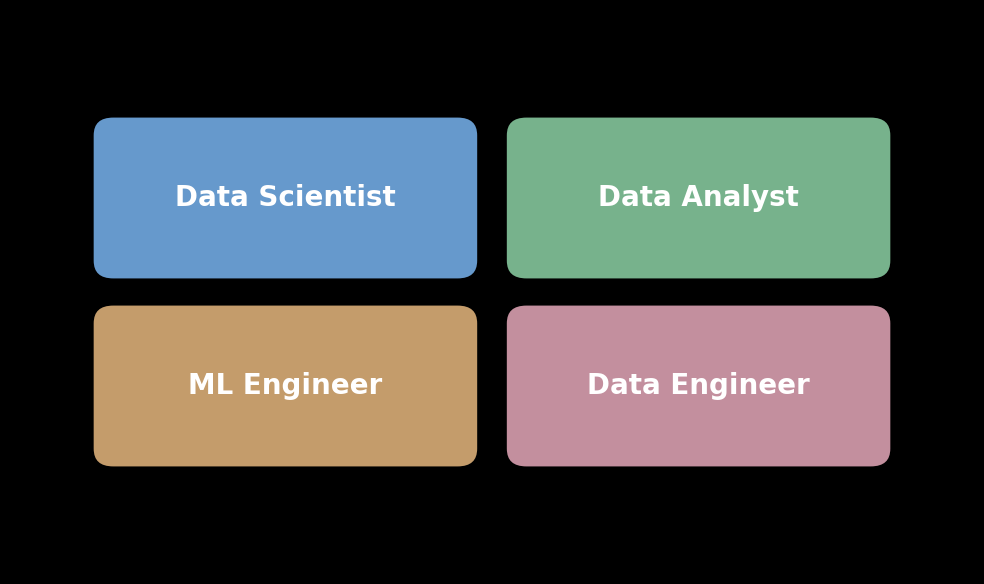

In [7]:
# Creating Job Category Column Visual

# Define the job categories and their corresponding colors
job_categories = ['Data Scientist', 'Data Analyst', 'ML Engineer', 'Data Engineer']
colors = ['#6699CC', '#77B28C', '#C49C6B', '#C38F9E']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Slightly larger figure for better layout

# Draw rounded rectangles for each job category
for i, (category, color) in enumerate(zip(job_categories, colors)):
    row = i // 2  # Determine row (0 or 1)
    col = i % 2   # Determine column (0 or 1)

    # Create rounded rectangles using FancyBboxPatch
    rect = FancyBboxPatch(
        (col * 6, -row * 3), 5, 2,  # Position and size
        boxstyle="round,pad=0.3,rounding_size=0.3",  # Rounded corners
        color=color, ec='black', lw=1.5  # Fill color and border
    )
    ax.add_patch(rect)

    # Add centered text inside each rectangle
    ax.text(
        col * 6 + 2.5, -row * 3 + 1, category,  # Adjusted text position
        va='center', ha='center', fontsize=20, color='white', weight='bold'
    )

# Adjust axis limits to fit all elements
ax.set_xlim(-1.5, 12.5)
ax.set_ylim(-5, 4)
ax.axis('off')  # Turn off the axis

# Optimize layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 600px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        3.2. Creating Work Model
    </h1>
</div>

In [8]:
# Converts remote ratio to work models labels and creates an original column.

# Mapping remote ratio to work models.
def map_remote_ratio(df, original_column='remote_ratio', new_column='work_model'):

    # Define the mapping dictionary
    remote_ratio_mapping = {
        0: 'In-Person',
        50: 'Hybrid',
        100: 'Remote'
    }

    # Apply the mapping with a default value of 'Other' for unmapped numbers
    df[new_column] = df[original_column].map(remote_ratio_mapping).fillna('Other')

    return df

# Example usage
df = map_remote_ratio(df)

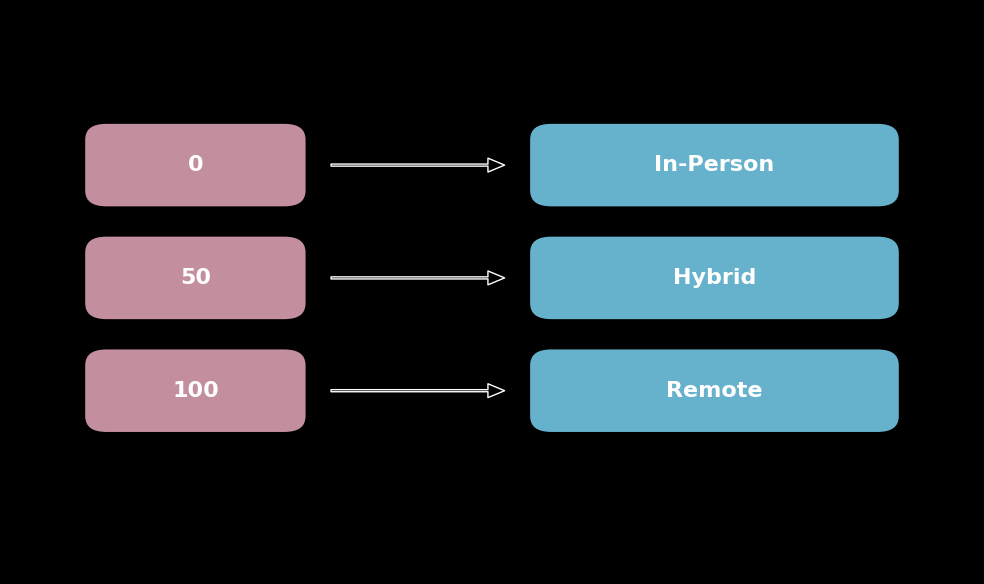

In [9]:
# Creating Work Model Column Visual

# Define the employment types and their labels
left_labels = ['0', '50', '100']
right_labels = ['In-Person', 'Hybrid', 'Remote']
left_color = '#C38F9E'
right_color = '#66B2CC'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Same figure size

# Draw rounded rectangles and arrows for each label
for i, (left, right) in enumerate(zip(left_labels, right_labels)):
    # Left side rounded rectangles
    rect_left = FancyBboxPatch(
        (0, -i * 2), 3, 1.5,  # Position and size
        boxstyle="round,pad=0.0,rounding_size=0.3",  # Rounded corners
        color=left_color, ec='black', lw=1.5  # Fill color and border
    )
    ax.add_patch(rect_left)
    ax.text(1.5, -i * 2 + 0.75, left,  # Text position
            va='center', ha='center', fontsize=16, color='white', weight='bold')

    # Right side rounded rectangles
    rect_right = FancyBboxPatch(
        (6, -i * 2), 5, 1.5,  # Position and size
        boxstyle="round,pad=0.0,rounding_size=0.3",  # Rounded corners
        color=right_color, ec='black', lw=1.5  # Fill color and border
    )
    ax.add_patch(rect_right)
    ax.text(8.5, -i * 2 + 0.75, right,  # Text position
            va='center', ha='center', fontsize=16, color='white', weight='bold')

    # Draw arrows between the left and right rectangles
    ax.annotate('', xy=(5.8, -i * 2 + 0.75), xytext=(3.2, -i * 2 + 0.75),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=10))

# Adjust axis limits and turn off the axis
ax.set_xlim(-1, 12)
ax.set_ylim(-6.5, 3.5)
ax.axis('off')

# Optimize layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 600px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        3.3. Manipulating Experience Level
    </h1>
</div>

In [10]:
# Converts experience levels into more descriptive names and replaces them on the original column.

# Mapping experience levels to more descriptive labels.
def map_experience_level(df, original_column='experience_level', new_column='experience_level'):

    # Define the mapping dictionary
    experience_level_mapping = {
        'EN': 'Junior',
        'MI': 'Mid-Level',
        'SE': 'Senior',
        'EX': 'Expert'
    }

    # Create the new column
    df[new_column] = df[original_column].replace(experience_level_mapping)
    return df

# Example usage
df = map_experience_level(df)

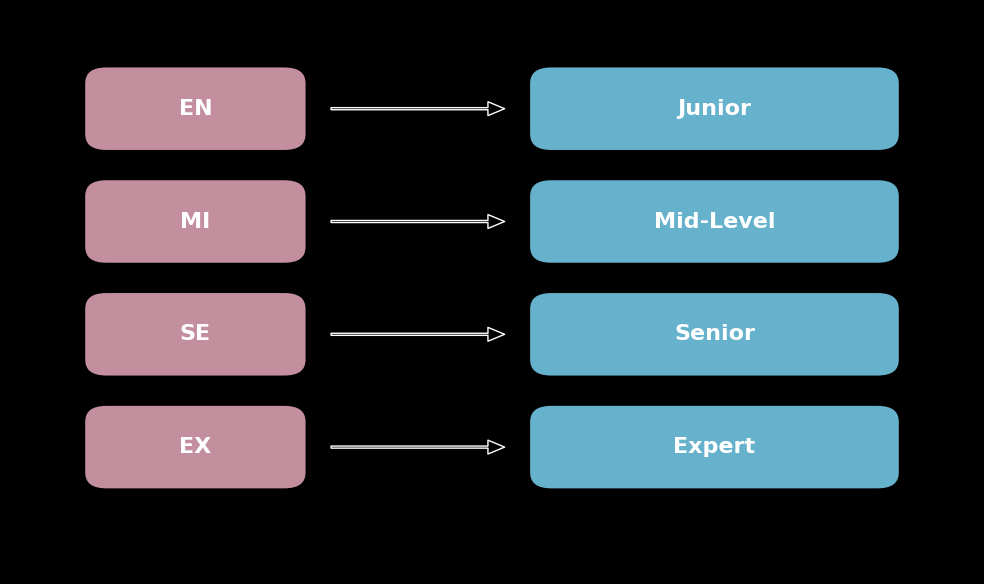

In [11]:
# Manipulating Experience Level Column Visual

# Define the employment types and their labels
left_labels = ['EN', 'MI', 'SE', 'EX']
right_labels = ['Junior', 'Mid-Level', 'Senior', 'Expert']
left_color = '#C38F9E'
right_color = '#66B2CC'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Same figure size

# Draw rounded rectangles and arrows for each label
for i, (left, right) in enumerate(zip(left_labels, right_labels)):
    # Left side rounded rectangles
    rect_left = FancyBboxPatch(
        (0, -i * 2), 3, 1.5,  # Position and size
        boxstyle="round,pad=0.0,rounding_size=0.3",  # Rounded corners
        color=left_color, ec='black', lw=1.5  # Fill color and border
    )
    ax.add_patch(rect_left)
    ax.text(1.5, -i * 2 + 0.75, left,  # Text position
            va='center', ha='center', fontsize=16, color='white', weight='bold')

    # Right side rounded rectangles
    rect_right = FancyBboxPatch(
        (6, -i * 2), 5, 1.5,  # Position and size
        boxstyle="round,pad=0.0,rounding_size=0.3",  # Rounded corners
        color=right_color, ec='black', lw=1.5  # Fill color and border
    )
    ax.add_patch(rect_right)
    ax.text(8.5, -i * 2 + 0.75, right,  # Text position
            va='center', ha='center', fontsize=16, color='white', weight='bold')

    # Draw arrows between the left and right rectangles
    ax.annotate('', xy=(5.8, -i * 2 + 0.75), xytext=(3.2, -i * 2 + 0.75),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=10))

# Adjust axis limits and turn off the axis
ax.set_xlim(-1, 12)  # Same x-axis limit
ax.set_ylim(-7.5, 2.5)  # Same y-axis limit
ax.axis('off')  # Hide the axis

# Optimize layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 600px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        3.4. Manipulating Employment Type
    </h1>
</div>

In [12]:
# Converts employment types into more descriptive names and replaces them on the original column.

# Mapping employment types to more descriptive labels.
def map_employment_type(df, original_column='employment_type', new_column='employment_type'):

    # Define the mapping dictionary
    employment_type_mapping = {
        'FT': 'Full-Time',
        'PT': 'Part-Time',
        'CT': 'Contract',
        'FL': 'Freelance'
    }

    # Apply the mapping with a default value of 'Other' for unmapped codes
    df[new_column] = df[original_column].map(employment_type_mapping).fillna('Other')

    return df

# Example usage
df = map_employment_type(df)

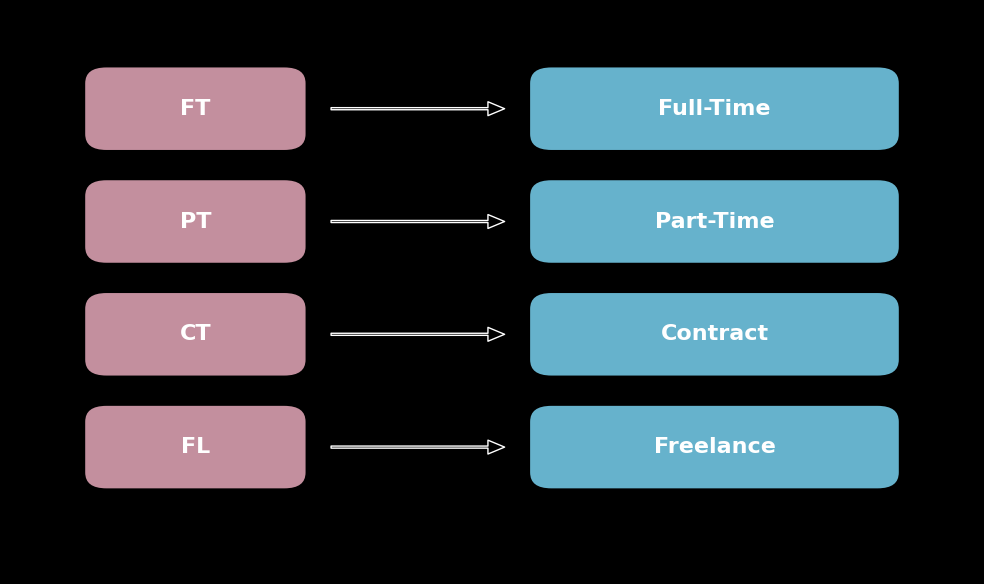

In [13]:
# Manipulating Employment Type Column Visual

# Define the employment types and their labels
left_labels = ['FT', 'PT', 'CT', 'FL']
right_labels = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']
left_color = '#C38F9E'
right_color = '#66B2CC'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Same figure size

# Draw rounded rectangles and arrows for each label
for i, (left, right) in enumerate(zip(left_labels, right_labels)):
    # Left side rounded rectangles
    rect_left = FancyBboxPatch(
        (0, -i * 2), 3, 1.5,  # Position and size
        boxstyle="round,pad=0.0,rounding_size=0.3",  # Rounded corners
        color=left_color, ec='black', lw=1.5  # Fill color and border
    )
    ax.add_patch(rect_left)
    ax.text(1.5, -i * 2 + 0.75, left,  # Text position
            va='center', ha='center', fontsize=16, color='white', weight='bold')

    # Right side rounded rectangles
    rect_right = FancyBboxPatch(
        (6, -i * 2), 5, 1.5,  # Position and size
        boxstyle="round,pad=0.0,rounding_size=0.3",  # Rounded corners
        color=right_color, ec='black', lw=1.5  # Fill color and border
    )
    ax.add_patch(rect_right)
    ax.text(8.5, -i * 2 + 0.75, right,  # Text position
            va='center', ha='center', fontsize=16, color='white', weight='bold')

    # Draw arrows between the left and right rectangles
    ax.annotate('', xy=(5.8, -i * 2 + 0.75), xytext=(3.2, -i * 2 + 0.75),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=10))

# Adjust axis limits and turn off the axis
ax.set_xlim(-1, 12)  # Same x-axis limit
ax.set_ylim(-7.5, 2.5)  # Same y-axis limit
ax.axis('off')  # Hide the axis

# Optimize layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()


In [14]:
# Employment Type Value Counts List

# employment_type sütununun frekanslarını al
employment_type_counts = df['employment_type'].value_counts()

# Stilize edilmiş tabloyu DataFrame'e dönüştürme
employment_type_counts_df = employment_type_counts.reset_index()
employment_type_counts_df.columns = ['Employment Type', 'Count']

# Daha büyük boyutlu stilize edilmiş tablo
employment_type_counts_df.style.set_properties(**{
    'font-size': '14pt',  # Yazı boyutunu artırıyoruz
    'text-align': 'center',  # Ortalanmış yazı
    'padding': '10px'  # Hücrelerin boyutunu artırmak için padding ekliyoruz
}).set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '16pt'), ('text-align', 'center'), ('padding', '12px')]}]  # Başlık için stil
).background_gradient(cmap='YlGnBu')  # Arka plan rengi

<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 660px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        3.5. Checking Columns for Inconsistent & Invalid Data
    </h1>
</div>

In [15]:
# Salary Currency Value Counts List

# salary_currency de istenmeyen unique değer var mı kontrol et
salary_currency_counts = df['salary_currency'].value_counts()
salary_currency_counts_df = salary_currency_counts.reset_index()

salary_currency_counts_df.columns = ['Salary Currency', 'Count']

salary_currency_counts_df.style.set_properties(**{
    'font-size': '14pt',  # Yazı boyutunu artırıyoruz
    'text-align': 'center',  # Ortalanmış yazı
    'padding': '10px'  # Hücrelerin boyutunu artırmak için padding ekliyoruz
}).set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '16pt'), ('text-align', 'center'), ('padding', '12px')]}]  # Başlık için stil
).background_gradient(cmap='YlGnBu')  # Arka plan rengi

In [16]:
# Salary Negative Value Counts List

# salary de istenmeyen <=0 değer var mı kontrol et
undesired_values = df[df['salary'] <= 0].sort_values('salary', ascending=False).count()

undesired_values_df = undesired_values.reset_index()

undesired_values_df.columns = ['Salary', 'Count']

undesired_values_df.style.set_properties(**{
    'font-size': '14pt',  # Yazı boyutunu artırıyoruz
    'text-align': 'center',  # Ortalanmış yazı
    'padding': '10px'  # Hücrelerin boyutunu artırmak için padding ekliyoruz
}).set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '16pt'), ('text-align', 'center'), ('padding', '12px')]}]  # Başlık için stil
).background_gradient(cmap='YlGnBu')  # Arka plan rengi

<div style="
    color: white;
    display: block;
    border-radius: 15px;
    background-color: #003366;
    font-size: 100%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(300px, 100%, 1200px);
    margin: 0px;
">
    <h1 style="
        padding: 20px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        Step 4: Detecting and Handling Outliers
    </h1>
</div>

<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 600px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        4.1. Detecting Outliers
    </h1>
</div>

In [17]:
# Boxplot & DistPlot Chart: Outliers Control

# Veri hazırlığı
hist_data = [df['salary_in_usd']]
group_labels = ['Salary in USD']

# Box plot oluşturma
fig1 = px.box(
    y=df['salary_in_usd'], 
    template='plotly_dark', 
    title='Salary (BoxPlot)'
)

# Distplot oluşturma (Dağılım grafiği)
fig2 = ff.create_distplot(
    hist_data, 
    group_labels, 
    show_hist=False  # Histogram kapatıldı
)

# Subplot oluşturma: 1 satır, 2 sütun
fig = make_subplots(
    rows=1, cols=2,  # 1 satır, 2 sütun
    subplot_titles=('Salary (BoxPlot)', 'Salary (DistPlot)')  # Alt başlıklar
)

# Box plot'u ekleme
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Distplot'u ekleme
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Genel düzen ayarları
fig.update_layout(
    width=1500, height=700,  # Genişlik ve yükseklik
    template='plotly_dark',  # Karanlık tema
    font=dict(size=17, family='Franklin Gothic'),  # Yazı tipi
    showlegend=False  # Legend kapatma
)

# Grafik gösterimi
fig.show()


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 600px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        4.2. Handling Outliers
    </h1>
</div>

In [18]:
# Finding Q1, Q2, Q3 and calculating IQR, MIN, MAX

Q1=df["salary_in_usd"].quantile(0.25)
Q2=df["salary_in_usd"].quantile(0.50)
Q3=df["salary_in_usd"].quantile(0.75)
print(f"Q1={Q1}, Q2={Q2}, Q3={Q3}\n")

IQR = Q3 - Q1
print(f"IQR={IQR}\n")

lower_bound = Q1-(1.5 * IQR)
upper_bound = Q3+(1.5 * IQR)
print(f"MIN={lower_bound}, MAX={upper_bound}")

Q1=102000.0, Q2=141300.0, Q3=185900.0

IQR=83900.0

MIN=-23850.0, MAX=311750.0


In [19]:
# Detecting Outliers

salary_data = df['salary_in_usd']
outliers = salary_data[(salary_data < lower_bound) | (salary_data > upper_bound)]
outliers_count = len(outliers)
print(f"Number of Outliers: {outliers_count}")
#print(f"Number of Outliers: {outliers_count}, \nOutliers: \n{outliers}")

Number of Outliers: 270


In [20]:
# Deleting Outliers

df = df[~df['salary_in_usd'].isin(outliers)]

print("Outliers Deleted.")

Outliers Deleted.


In [21]:
# Boxplot & DistPlot Chart: Outliers Control Graphics (After Handling Outliers)

# Veri hazırlığı
hist_data = [df['salary_in_usd']]
group_labels = ['Salary in USD']

# Box plot oluşturma
fig1 = px.box(
    y=df['salary_in_usd'], 
    template='plotly_dark', 
    title='Salary (BoxPlot)'
)

# Distplot oluşturma (Dağılım grafiği)
fig2 = ff.create_distplot(
    hist_data, 
    group_labels, 
    show_hist=False  # Histogram kapatıldı
)

# Subplot oluşturma: 1 satır, 2 sütun
fig = make_subplots(
    rows=1, cols=2,  # 1 satır, 2 sütun
    subplot_titles=('Salary (BoxPlot)', 'Salary (DistPlot)')  # Alt başlıklar
)

# Box plot'u ekleme
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Distplot'u ekleme
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Genel düzen ayarları
fig.update_layout(
    width=1500, height=700,  # Genişlik ve yükseklik
    template='plotly_dark',  # Karanlık tema
    font=dict(size=17, family='Franklin Gothic'),  # Yazı tipi
    showlegend=False  # Legend kapatma
)

# Grafik gösterimi
fig.show()


<div style="
    color: white;
    display: block;
    border-radius: 15px;
    background-color: #003366;
    font-size: 100%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(300px, 100%, 1200px);
    margin: 0px;
">
    <h1 style="
        padding: 20px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        Step 5: Data Visualization
    </h1>
</div>

<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 550px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.1. Salary Distribution by Various Factors
    </h1>
</div>

In [22]:
# Violin & Boxplot Chart: Salary Distribution by Various Factors

# Grafikler için veri ve ayarlar
fig1 = px.violin(
    df, 
    x='work_model', 
    y='salary_in_usd', 
    title='Salary Distribution by Work Model', 
    template='plotly_dark', 
    box=True
)

fig2 = px.violin(
    df, 
    x='job_category', 
    y='salary_in_usd', 
    title='Salary Distribution by Job Category', 
    template='plotly_dark', 
    box=True
)

fig3 = px.box(
    df, 
    x='experience_level', 
    y='salary_in_usd', 
    title='Salary Distribution by Experience Level', 
    template='plotly_dark'
)

fig4 = px.box(
    df, 
    x='company_size', 
    y='salary_in_usd', 
    title='Salary Distribution by Experience Level', 
    template='plotly_dark'
)

# Subplot oluşturma
fig = make_subplots(
    rows=2, cols=2,  # 2 satır, 2 sütun
    subplot_titles=('Work Model', 'Job Category', 'Experience Level', 'Company Size'),  # Alt başlıklar
    shared_yaxes=True  # Y eksenini paylaşma
)

# Her violin plot'u subplot'a ekleme
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=2, col=1)
fig.add_trace(fig4.data[0], row=2, col=2)

# Genel düzen ayarları
fig.update_layout(
    title='Salary Distribution by Various Factors',
    width=1500, height=1100,  # Genişlik ve yükseklik
    font=dict(size=17, family='Franklin Gothic'),  # Yazı tipi
    showlegend=False,  # Legend'i kapatma
    template='plotly_dark',  # Karanlık tema
    plot_bgcolor='#000000',  # Grafik arka planı (koyu gri)
    paper_bgcolor='#000000',  # Sayfa arka planı (koyu gri)
    margin=dict(l=50, r=50, t=70, b=50)  # Kenar boşlukları
)

# Grafik gösterimi
fig.show()


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 600px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.2. Salary & Job Postings Trends Overtime
    </h1>
</div>

In [23]:
# Line Chart: Overview - Salary & Job Postings Trends Overtime

# 1. Grafik: Salary Trends Over Time
salary_trends = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
fig1 = px.line(
    salary_trends, x='work_year', y='salary_in_usd',
    title='Salary Trends Over Time',
    markers=True, template='plotly_dark'
)
fig1.update_xaxes(tickvals=salary_trends['work_year'].unique(), tickformat='%Y')

# 2. Grafik: Salary Trends Over Time by Job Category
salary_trends_by_category = df.groupby(['work_year', 'job_category'])['salary_in_usd'].mean().reset_index()
fig2 = px.line(
    salary_trends_by_category, x='work_year', y='salary_in_usd',
    color='job_category', title='Salary Trends Over Time by Job Category',
    markers=True, template='plotly_dark'
)
fig2.update_xaxes(tickvals=salary_trends_by_category['work_year'].unique(), tickformat='%Y')

# 3. Grafik: Job Postings Over Time
job_postings_over_time = df.groupby('work_year')['job_category'].count().reset_index(name='count')
fig3 = px.line(
    job_postings_over_time, x='work_year', y='count',
    title='Job Postings Over Time',
    markers=True, template='plotly_dark'
)
fig3.update_xaxes(tickvals=job_postings_over_time['work_year'].unique(), tickformat='%Y')

# 4. Grafik: Job Postings Over Time by Job Category
job_postings_by_category = df.groupby(['work_year', 'job_category']).size().reset_index(name='count')
fig4 = px.line(
    job_postings_by_category, x='work_year', y='count',
    color='job_category', title='Job Postings Over Time by Job Category',
    markers=True, template='plotly_dark'
)
fig4.update_xaxes(tickvals=job_postings_by_category['work_year'].unique(), tickformat='%Y')

# Subplot oluşturma: 2 satır, 2 sütun
fig = make_subplots(
    rows=2, cols=2,  # 2 satır, 2 sütun
    subplot_titles=('Salary Trends Over Time', 'Salary Trends by Job Category',
                    'Job Postings Over Time', 'Job Postings by Job Category'),
    shared_xaxes=False,  # X eksenlerini paylaşma
    shared_yaxes=False  # Y eksenlerini paylaşma
)

# Grafik verilerini subplotlara ekleme
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

for trace in fig3.data:
    fig.add_trace(trace, row=2, col=1)

for trace in fig4.data:
    fig.add_trace(trace, row=2, col=2)

# Genel düzen ayarları
fig.update_layout(
    height=1100, width=1600,  # Genel boyutlar
    title_text='Overview: Salary and Job Postings Trends',  # Genel başlık
    showlegend=True,  # Her grafiğin kendi legend'i olacağı için kapatıyoruz
    font=dict(size=17, family='Franklin Gothic'),  # Genel font ayarı
    template='plotly_dark'  # plot_bgcolor='#000000', paper_bgcolor='#000000'  # Arka planı siyah yapıyoruz
)

# Grafik gösterimi
fig.show()


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 660px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.3. Salary Trends Over Time with ARIMA Forecast
    </h1>
</div>

In [24]:
# Line Chart: Salary Trends Over Time with ARIMA Forecast (2025-2029)

# Ortalama maaşları gruplama
salary_trends = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Zaman serisi oluşturma
salary_trends['work_year'] = pd.to_datetime(salary_trends['work_year'].astype(str))

# ARIMA modelini oluşturma ve eğitim
model = sm.tsa.ARIMA(salary_trends['salary_in_usd'], order=(1, 1, 1))  # (p, d, q) parametrelerini ayarlayabilirsiniz
model_fit = model.fit()

# Gelecek 5 yıl için tahmin yapma
forecast = model_fit.forecast(steps=5)

# Gelecek yıllar için tarih aralığı oluşturma
future_years = pd.date_range(start='2024-01-01', periods=5, freq='Y')
forecast_df = pd.DataFrame({
    'work_year': future_years,
    'salary_in_usd': forecast
})

# Geçmiş ve tahmin verilerini birleştirme
combined_df = pd.concat([salary_trends, forecast_df])

# Line chart oluşturma
fig = go.Figure()

# Geçmiş verileri ekleme
fig.add_trace(
    go.Scatter(
        x=salary_trends['work_year'],
        y=salary_trends['salary_in_usd'],
        mode='lines+markers',
        name='Historical Salary'
    )
)

# Tahmin verilerini ekleme
fig.add_trace(
    go.Scatter(
        x=forecast_df['work_year'],
        y=forecast_df['salary_in_usd'],
        mode='lines+markers',
        name='Forecasted Salary',
        line=dict(dash='dash')  # Tahminler için kesik çizgi
    )
)

# Grafik ayarları
fig.update_layout(
    title='Salary Trends Over Time with ARIMA Forecast (2025-2029)',
    xaxis_title='Year',
    yaxis_title='Average Salary (USD)',
    template='plotly_dark',
    font=dict(size=17, family='Franklin Gothic'),
    width=1500,
    height=800
)

# X-ticks ayarları: Yılları düzgün göstermek ve döndürme eklemek
fig.update_xaxes(
    tickformat='%Y',  # Yıl formatında gösterim
    dtick='M12',  # Her 12 ayda bir tick ekle (yıllık)
    tickangle=0  # X ekseni etiketlerini 45 derece döndür
)

# Grafik gösterimi
fig.show()


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 950px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.4. Correlation Between Salary & Employee Residence & Company Location
    </h1>
</div>

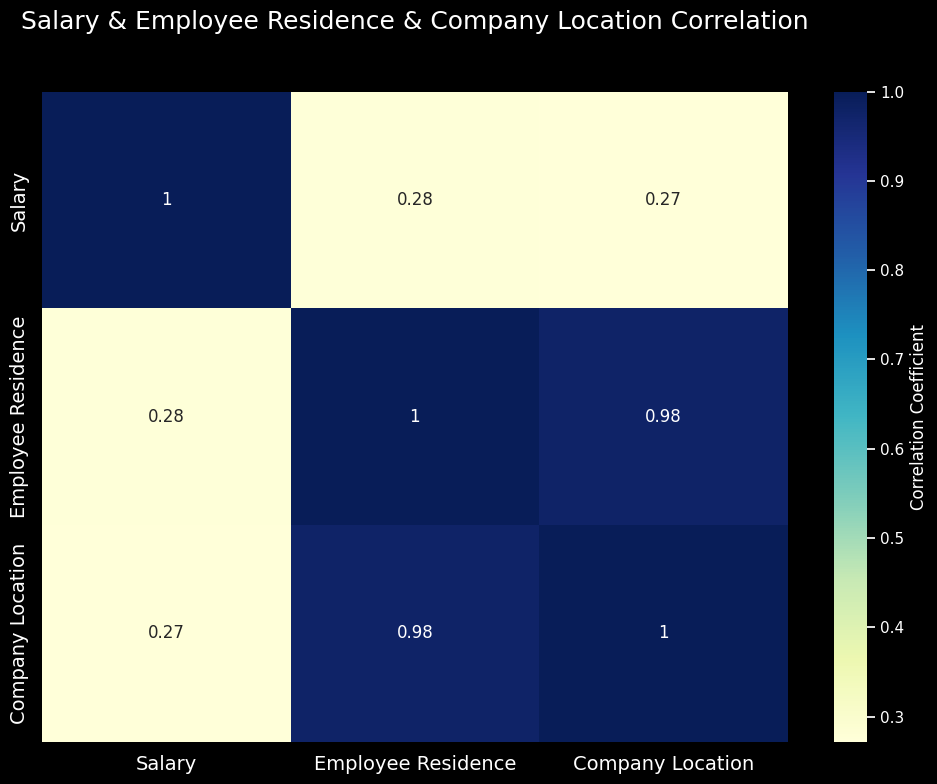

In [25]:
# HeatMap Chart: Correlation Between Salary & Employee Residence & Company Location

# Kategorik sütunları sayısallaştırma
le = LabelEncoder()
df['employee_residence_encoded'] = le.fit_transform(df['employee_residence'])
df['company_location_encoded'] = le.fit_transform(df['company_location'])

# Korelasyon matrisini hesaplama
correlation_matrix = df[['salary_in_usd', 'employee_residence_encoded', 'company_location_encoded']].corr()
xtick_labels = ['Salary', 'Employee Residence', 'Company Location']
ytick_labels = ['Salary', 'Employee Residence', 'Company Location']

# Create HeatMap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Correlation Coefficient'}, 
    xticklabels=xtick_labels, 
    yticklabels=ytick_labels
)

# X ekseni etiketlerini çapraz yazdırma
plt.xticks(fontsize=14, rotation=0, ha='center')

# Y ekseni etiketlerini düz bırakma
plt.yticks(fontsize=14, rotation=90)

# Başlık ekleme
plt.title('Salary & Employee Residence & Company Location Correlation', fontsize=18, pad=45)
plt.tight_layout()
plt.show()

<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 700px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.6. Salary & Job Postings Distribution by Job Category
    </h1>
</div>

In [26]:
# Bar Chart: Job Postings by Job Category (Colored by Salary)

# Veriyi hazırlama: İş kategorisine göre ilan sayısı ve ortalama maaş
job_postings_and_salary = (
    df.groupby('job_category')
    .agg(
        job_posting_count=('job_category', 'size'),  # İlan sayısı
        avg_salary=('salary_in_usd', 'mean')  # Ortalama maaş
    )
    .reset_index()
)

# Bar grafiği oluşturma
fig = px.bar(
    job_postings_and_salary,
    x='job_posting_count',  # X ekseni: İlan sayısı
    y='job_category',  # Y ekseni: İş kategorisi
    color='avg_salary',  # Renk: Ortalama maaşa göre
    color_continuous_scale='Blues',  # Mavi renk paleti
    title='Job Postings by Job Category (Colored by Salary)',  # Grafik başlığı
    text='job_posting_count',  # Çubuklarda ilan sayısını göster
    width=1200, height=800,  # Grafik boyutu
    template='plotly_dark'  # Karanlık tema
)

# Layout ayarları: Arka plan ve eksen başlıkları
fig.update_layout(
    xaxis_title='Job Count',  # X ekseni başlığı
    yaxis_title='Job Category',  # Y ekseni başlığı
    title={'x': 0.5, 'font_size': 24},  # Başlık ortalama ve yazı boyutu
)

# Çubukların yazı boyutu ve konumu
fig.update_traces(
    texttemplate='%{text}',  # Çubuğun üstünde değer göster
    textposition='outside',  # Metni çubuğun dışına yerleştir
    textfont_size=14  # Yazı boyutu
)

# Grafik gösterimi
fig.show()


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 850px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.7. Salary & Job Postings by Employment Type & Experience Level
    </h1>
</div>

In [27]:
# Sunburst Chart: Job Postings by Employment Type & Experience Level (Colored by Salary)

# Veriyi hazırlama: Experience Level ve Employment Type'a göre ilan sayısı ve ortalama maaş
job_postings_with_salary = (
    df.groupby(['employment_type', 'experience_level'])
    .agg(
        job_posting_count=('employment_type', 'size'),  # İlan sayısı
        avg_salary=('salary_in_usd', 'mean')  # Ortalama maaş
    )
    .reset_index()
)

# Sunburst grafiği oluşturma
fig = px.sunburst(
    job_postings_with_salary,
    path=['employment_type', 'experience_level'],  # Hiyerarşi: Employment Type -> Experience Level
    values='job_posting_count',  # Dilim büyüklüğü: İlan sayısı
    color='avg_salary',  # Renk: Ortalama maaşa göre
    color_continuous_scale='Blues',  # Mavi renk paleti
    title='Job Postings by Employment Type & Experience Level (Colored by Salary)',  # Grafik başlığı
    labels={
        'job_posting_count': 'Number of Job Postings',
        'avg_salary': 'Average Salary (USD)'
    },
    width=1200, height=800,  # Grafik boyutu
    template='plotly_dark'  # Karanlık tema
)

# Layout ayarları: Arka plan ve eksen başlıkları
fig.update_layout(
    title={'x': 0.5, 'font_size': 24},  # Başlık ortalama ve yazı boyutu
)

# Her dilime ilan sayısı ve yüzdesi eklemek için custom data
fig.update_traces(
    textinfo='label+text+percent entry',  # Etiket, sayı ve yüzde gösterimi
    customdata=job_postings_with_salary[['job_posting_count', 'avg_salary']],  # İlan sayısı ve maaş bilgisi
    hovertemplate=(
        '<b>%{label}</b><br>'
        'Number of Postings: %{customdata[0]}<br>'
        'Average Salary (USD): %{customdata[1]:.2f}'
    )
)

# Grafik gösterimi
fig.show()


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 550px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.8. Salary & Job Postings by Work Model
    </h1>
</div>

In [28]:
# Density Heatmap Chart: Salary by Work Model (Colored by Job Postings)

# Density Heatmap
fig = px.density_heatmap(
    df,
    x='work_model',
    y='salary_in_usd',
    title='Salary by Work Model (Colored by Job Postings)',
    labels={'salary_in_usd': 'Salary (USD)', 'work_model': 'Work Model'},
    color_continuous_scale='Blues',  # Renk paleti
    width=1200,  # Genişlik
    height=800   # Yükseklik
)

# X ve Y ekseni ayarları (Tekrarlardan kaçınmak için)
fig.update_xaxes(
    title_font=dict(size=16, family='Franklin Gothic'),  # X ekseni başlık fontu
    tickangle=0,  # X ekseni etiket açısı
    tickfont=dict(size=18)  # X ekseni etiket boyutu
)
fig.update_yaxes(
    title_font=dict(size=16, family='Franklin Gothic'),  # Y ekseni başlık fontu
    tickangle=0,  # Y ekseni etiket açısı
    tickfont=dict(size=16)  # Y ekseni etiket boyutu
)

# Layout (Düzen) ve arka plan ayarları
fig.update_layout(
    template='plotly_dark',  # Plotly Dark teması
    font=dict(size=16, family='Franklin Gothic'),  # Genel yazı tipi
    title=dict(
        text='Salary by Work Model (Colored by Job Postings)',  # Başlık
        font=dict(size=24),  # Başlık fontu
        pad=dict(t=10, b=20)  # Başlık üst-alt boşlukları
    ),
    margin=dict(l=50, r=50, t=50, b=50),  # Grafik kenar boşlukları
)

# Grafik gösterimi
fig.show()


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 600px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.9. Salary & Job Postings by Company Size
    </h1>
</div>

In [29]:
# Pie Chart: Job Postings by Company Size (Colored by Salary)

# Veriyi hazırlama: Company Size'a göre ilan sayısı ve ortalama maaş
job_postings_and_salary = (
    df.groupby('company_size')
    .agg(
        job_posting_count=('company_size', 'size'),  # İlan sayısı
        avg_salary=('salary_in_usd', 'mean')  # Ortalama maaş
    )
    .reset_index()
)

# İlan sayılarını yüzdeyle hesaplama
total_postings = job_postings_and_salary['job_posting_count'].sum()
job_postings_and_salary['percentage'] = (
    job_postings_and_salary['job_posting_count'] / total_postings * 100
).round(2)  # Yüzdeyi iki ondalık basamağa yuvarladık

# Sunburst grafiği oluşturma
fig = px.sunburst(
    job_postings_and_salary,
    path=['company_size'],  # Hiyerarşi: Sadece company_size
    values='job_posting_count',  # Dilim büyüklüğü: İlan sayısı
    color='avg_salary',  # Renk: Ortalama maaşa göre
    color_continuous_scale='Blues',  # Mavi renk paleti
    title='Job Postings by Company Size (Colored by Salary)',  # Grafik başlığı
    labels={
        'job_posting_count': 'Number of Job Postings',
        'avg_salary': 'Average Salary (USD)'
    },
    width=1200, height=800,  # Grafik boyutu
    template='plotly_dark'  # Karanlık tema
)

# Layout ayarları: Başlık ortalama ve yazı boyutu
fig.update_layout(
    title={'x': 0.5, 'font_size': 24},  # Başlık ortada
)

# Her dilime ilan sayısı ve yüzdeyi eklemek için custom data
fig.update_traces(
    textinfo='label+text+percent entry',  # Etiket, sayı ve yüzde gösterimi
    customdata=job_postings_and_salary[['job_posting_count', 'percentage']],  # İlan sayısı ve yüzde bilgisi
    hovertemplate='<b>%{label}</b><br>'  # Hover için
                  'Number of Postings: %{customdata[0]}<br>'
                  'Percentage: %{customdata[1]}%'
)

# Grafik gösterimi
fig.show()


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 600px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.10. Salary vs Salary Currency by Job Category
    </h1>
</div>

In [30]:
# Scatter Chart: Salary vs Salary Currency by Job Category

# Create the scatter plot
fig = px.scatter(
    x=df['salary_currency'].values, 
    y=df['salary_in_usd'].values, 
    color=df['job_category'].values,  # Different colors for different job roles
    size=df['salary_in_usd'].values,  # Circle size proportional to salary
    title='Salary vs Salary Currency',
    labels={'x': 'Salary Currency', 'y': 'Salary'})

# Adjust layout, including background colors
fig.update_layout(
    title={'text': 'Salary vs Salary Currency', 'font_size': 24, 'x': 0.5},
    width=1800,
    height=1100,
    template='plotly_dark'
)

# Customize marker size and text font
fig.update_traces(
    marker=dict(line=dict(width=0.0, color='DarkSlateGrey')),
    textfont_size=14
)

# Display the chart
fig.show()


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 850px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.11. Job Category by Work Model & Employement Type Comparison
    </h1>
</div>

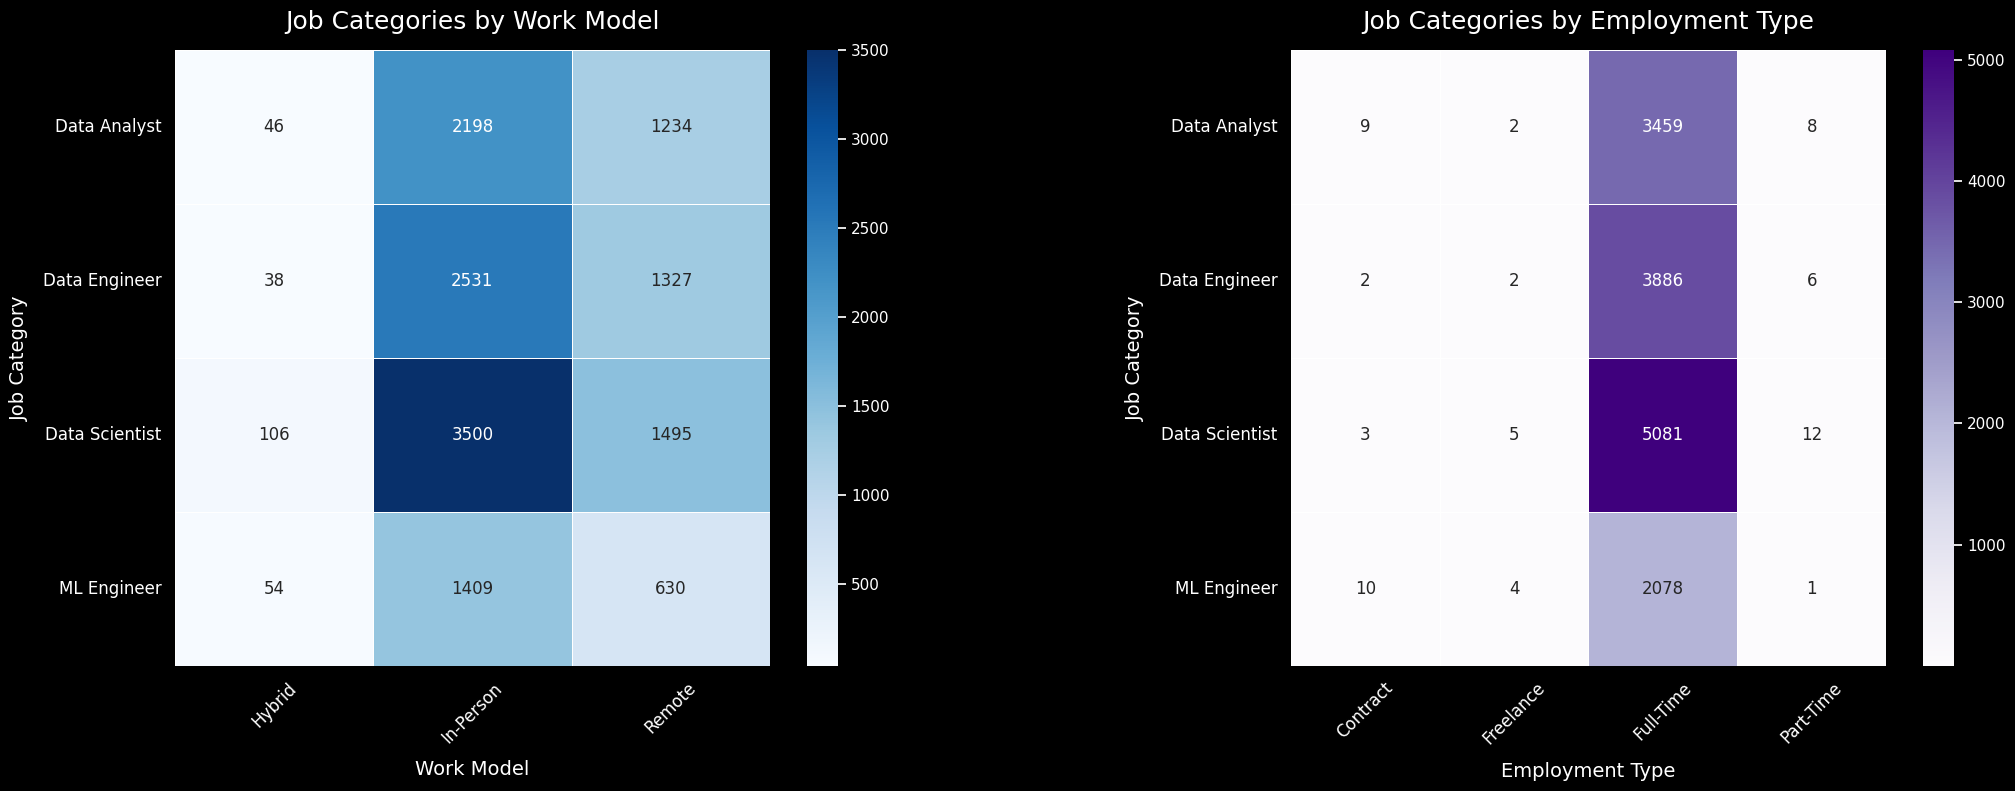

In [31]:
# Heatmap Chart: Job Category by Work Model & Employement Type

# 1. Heatmap: Job Categories by Work Model
job_category_by_work_model = pd.crosstab(df['job_category'], df['work_model'])

# 2. Heatmap: Job Categories by Employment Type
job_category_by_employment_type = pd.crosstab(df['job_category'], df['employment_type'])

# Subplot oluşturma: 1 satır, 2 sütun
fig, axes = plt.subplots(1, 2, figsize=(24, 8))  # Yan yana iki grafik

# Arka plan rengini ayarlama (Plotly Dark teması benzeri)
fig.patch.set_facecolor('#000000')  # Genel arka plan
plt.subplots_adjust(wspace=0.5)  # Grafikler arası boşluk

# 1. Heatmap'i oluşturma
sns.heatmap(
    job_category_by_work_model,
    annot=True, cmap='Blues', fmt='d', linewidths=0.5, ax=axes[0]
)
axes[0].set_title("Job Categories by Work Model", fontsize=18, color='white', pad=15)
axes[0].set_xlabel("Work Model", fontsize=14, labelpad=10, color='white')
axes[0].set_ylabel("Job Category", fontsize=14, labelpad=10, color='white')
axes[0].tick_params(axis='x', rotation=45, labelsize=12, colors='white')
axes[0].tick_params(axis='y', rotation=0, labelsize=12, colors='white')

# 2. Heatmap'i oluşturma
sns.heatmap(
    job_category_by_employment_type,
    annot=True, cmap='Purples', fmt='d', linewidths=0.5, ax=axes[1]
)
axes[1].set_title("Job Categories by Employment Type", fontsize=18, color='white', pad=15)
axes[1].set_xlabel("Employment Type", fontsize=14, labelpad=10, color='white')
axes[1].set_ylabel("Job Category", fontsize=14, labelpad=10, color='white')
axes[1].tick_params(axis='x', rotation=45, labelsize=12, colors='white')
axes[1].tick_params(axis='y', rotation=0, labelsize=12, colors='white')

# Gösterim
plt.show()


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 500px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.11. Job Postings by Top 10 Job Titles
    </h1>
</div>

In [32]:
# Bar Chart: Job Postings by Top 10 Job Titles

top10_job_title = df['job_title'].value_counts()[:10]
fig = px.bar(
            y=top10_job_title.values,
            x=top10_job_title.index,
            color = top10_job_title.index,
            color_discrete_sequence=px.colors.sequential.haline,
            text=top10_job_title.values,
            title= 'Job Postings by Top 10 Job Titles',
            template= 'plotly_dark',
            width=1500,
            height=1000
)
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="Job Postings",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 650px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.12. Job Postings by Top 10 Location of Employee
    </h1>
</div>

In [33]:
# Bar Chart: Job Postings by Top 10 Location of Employee

residence = df['employee_residence'].value_counts()
top10_employee_location = residence[:10]
fig = px.bar(
                y=top10_employee_location.values,
                x=top10_employee_location.index,
                color = top10_employee_location.index,
                color_discrete_sequence=px.colors.sequential.haline,
                text=top10_employee_location.values,
                title= 'Top 10 Location of Employee',
                template= 'plotly_dark',
                width=1500,
                height=1000
                )
fig.update_layout(
    xaxis_title="Location of Employee",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 650px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.13. Salary Distribution for Different Job Categories
    </h1>
</div>

In [34]:
# Histogram Chart: Salary Distribution for Different Job Categories

# Create a Histogram with Facet columns for job category
# 2x2 layout ile histogramları oluşturma
fig = px.histogram(
    df,
    x='salary_in_usd',
    color='job_category',
    facet_col='job_category',  # Kategorileri sütunlara bölme
    facet_col_wrap=2,  # 2 sütunlu layout
    title='Salary Distribution for Different Job Categories',
    labels={'salary_in_usd': 'Salary (USD)'},
    width=1600,  # Grafik genişliği
    height=1100,  # Grafik yüksekliği
    template='plotly_dark'  # Karanlık tema
)

# Her facette başlıkları düzenlemek için layout'u güncelle
for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split('=')[1]  # "job_category=..." kısmından kategoriyi al

# Layout ve diğer ayarlar
fig.update_layout(
    title=dict(text='Salary Distribution for Different Job Categories', font_size=24, x=0.5),  # Genel başlık
    margin=dict(l=50, r=50, t=80, b=50),  # Kenar boşlukları
    showlegend=True  # Her facette renkler ayrı gösterildiğinden tek efsane kapatıldı
)

# Grafik gösterimi
fig.show()


<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 700px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.14. Average Salary by Company Size & Job Category
    </h1>
</div>

In [35]:
# Bar Chart: Average Salary by Company Size & Job Category

# Verileri company_size, job_category ve salary_in_usd'e göre gruplama ve ortalama maaşı hesaplama
df_grouped = df.groupby(['company_size', 'job_category'])['salary_in_usd'].mean().reset_index()

# Bar grafiği oluşturma (her job_category için company_size'ya göre ortalama maaşlar)
fig = px.bar(
    df_grouped,
    x='job_category',
    y='salary_in_usd',
    color='company_size',
    barmode='group',  # Yan yana gruplandırılmış barlar
    title='Average Salary by Company Size and Job Category',
    labels={'salary_in_usd': 'Average Salary (USD)', 'job_category': 'Job Category'},
    template='plotly_dark',
    color_discrete_sequence=['#007acc', '#4199d1', '#66b3d6', '#8cccd9'],
    width=1200,
    height=800
)

# Grafiğin düzenini özelleştirme
fig.update_layout(
    xaxis_title='Job Category',
    yaxis_title='Average Salary (USD)',
    legend_title='Company Size',
    font=dict(size=14),
    xaxis_tickangle=-45  # X ekseni etiketlerini döndürme
)

# Grafiği gösterme
fig.show()

<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 500px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.15. Remote Work Trends Over Years
    </h1>
</div>

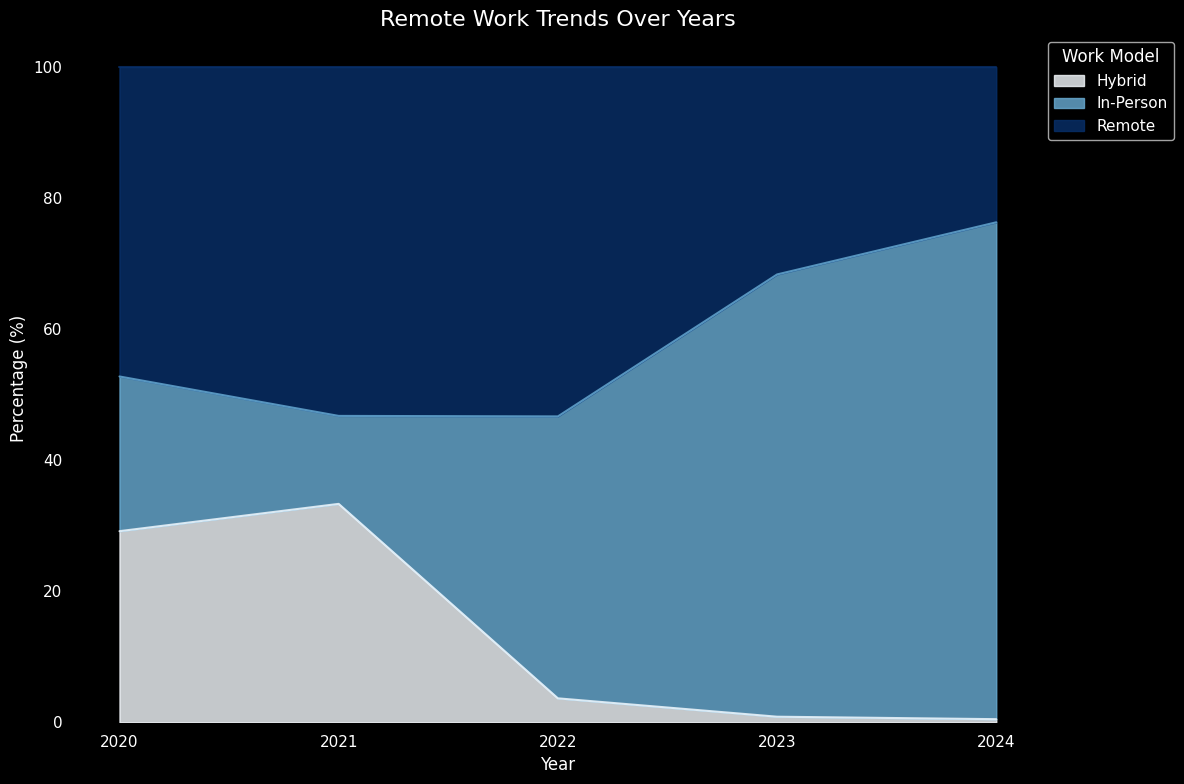

In [36]:
# Area Chart: Remote Work Trends Over Years (Colored by Work Model)

# Yıllara göre remote category dağılımı
remote_trend = df.groupby(['work_year', 'work_model']).size().unstack().fillna(0)

remote_trend_percentage = remote_trend.div(remote_trend.sum(axis=1), axis=0) * 100

# Area chart çizimi, sade ve belirgin renk paleti ile
remote_trend_percentage.plot(
    kind='area',
    stacked=True,
    figsize=(12, 8),
    colormap='Blues',  # Daha sade bir renk paleti
    alpha=0.8
)

# Eksen ve başlık ayarları
plt.title('Remote Work Trends Over Years', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Percentage (%)')

# X eksenindeki yılları yalnızca tam sayılar olarak göstermek (buçuklu yılları kaldırmak)
years = remote_trend_percentage.index.tolist()  # Yılların listesini almak
plt.xticks(ticks=years, labels=years)  # Sadece tam yıllar görünür olacak

# Yan çerçeveyi (legend) kaldırmak veya konumunu ayarlamak için
plt.legend(
    title='Work Model',
    loc='upper left',
    bbox_to_anchor=(1, 1),  # Grafiğin dışında sağ üst köşeye taşır
    frameon=True  # Çerçeve ayarı
)

# Çerçeveleri kaldırmak (spines)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Gösterme
plt.tight_layout()
plt.show()

<div style="
    color: white;
    display: block;
    border-radius: 50px;
    background-color: #325B84;
    font-size: 60%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(150px, 100%, 500px);
    margin: 0px;
">
    <h1 style="
        padding: 12px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        5.16. Job Titles Distribution Overview
    </h1>
</div>

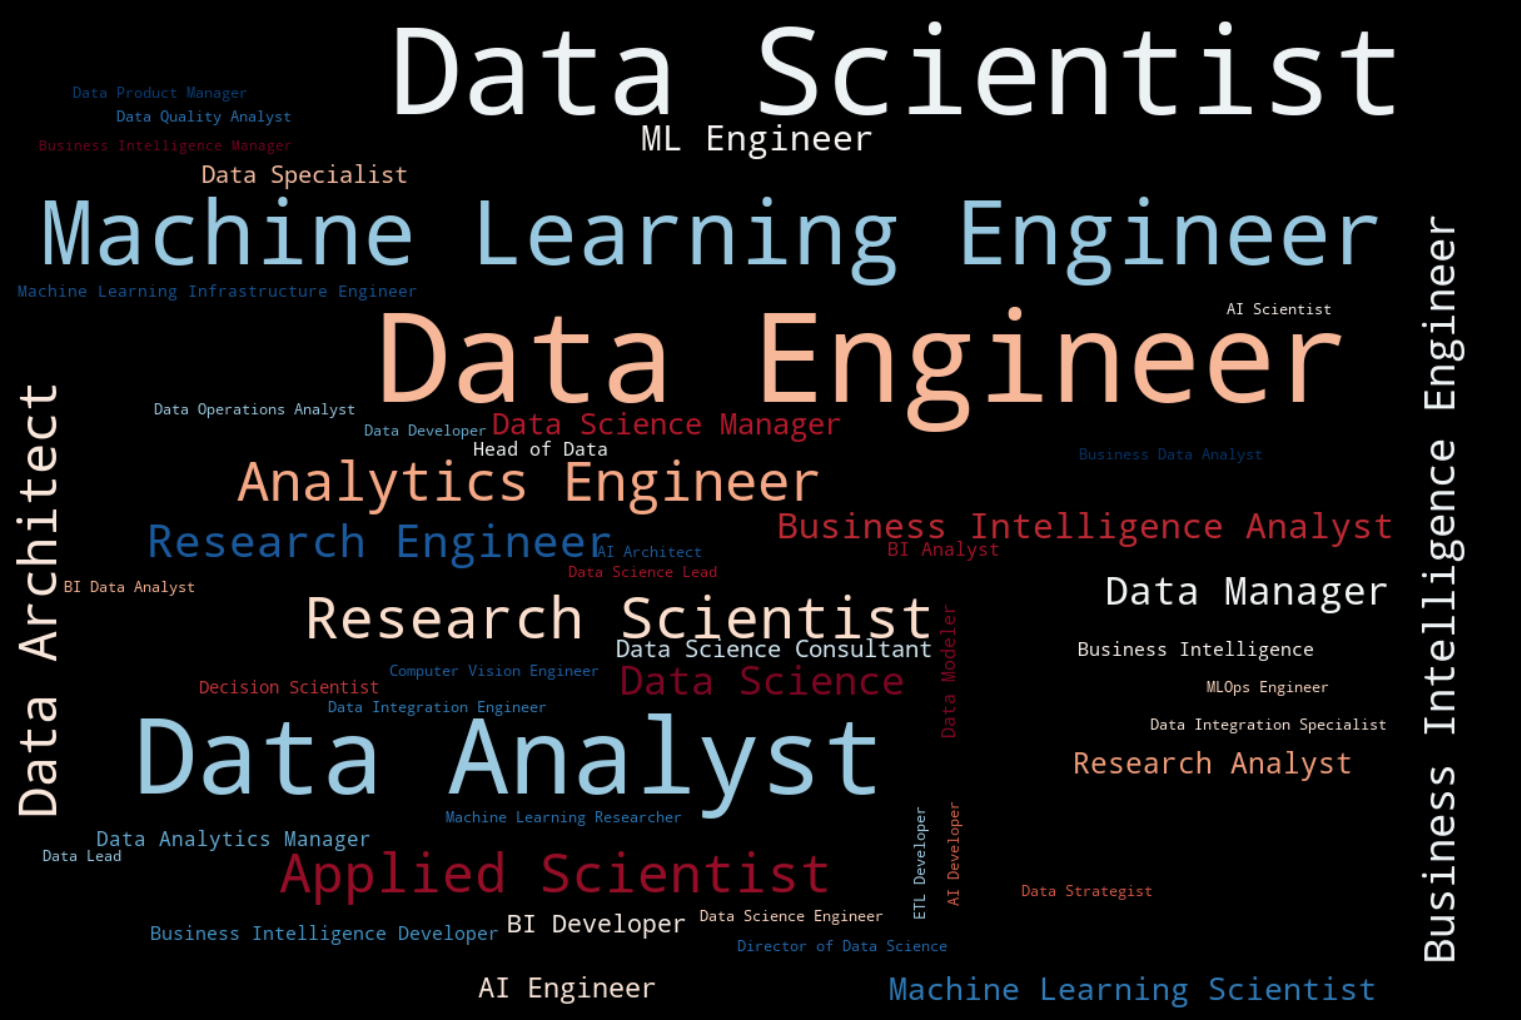

In [37]:
# WordCloud: Job Titles Distribution Overview

def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (26,13))
    wc = WordCloud(
                    width=1200,
                    height=800,
                    max_words=50,
                    colormap= colormap,
                    max_font_size = 100,
                    random_state=88,
                    background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()


freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', '')

<div style="
    color: white;
    display: block;
    border-radius: 15px;
    background-color: #003366;
    font-size: 100%;
    font-family: 'Open Sans', sans-serif;
    letter-spacing: 1px;
    width: clamp(300px, 100%, 1200px);
    margin: 0px;
">
    <h1 style="
        padding: 20px;
        color: #d0d3d4;
        text-align: left;
        margin: 10px;
    ">
        Step 6: Conclusion - Key Insights and Summary
    </h1>
</div>

## Key Findings

- This analysis provided **valuable insights into the dynamics of data science jobs**.

- By exploring **salary trends, employment types, experience levels,** and **company sizes**, we identified several key factors that influence compensation in the field.

### 📍 **Remote Work and Salary**
- The ratio of **remote work** has a significant impact on salaries.  
- In certain sectors, **fully remote workers** can command **competitive salaries** compared to their in-office counterparts.

### 📍 **Experience Level and Salary**
- **Experience level** plays a crucial role in salary determination.  
- **Senior** and **expert-level positions** show significantly **higher salaries**, especially in regions like the **US and Europe**.

### 📍 **Company Size and Salary**
- **Larger companies** tend to offer **more competitive salaries**.  
- **Small and medium-sized companies**, however, often provide **other employment advantages** (e.g., work-life balance, career growth opportunities).

<br />

## Strategic Career Planning

These insights can help both **seasoned professionals** and **newcomers** make informed career decisions by:
- Understanding the **impact of remote work** on compensation.
- Benchmarking **salaries based on experience levels**.
- Weighing the pros and cons between **different company sizes**.

<br />

# Additional Insights from the Data Science Job Analysis

### 📈 **Salary Growth in Data Fields**
- **Salaries in the data science field** have shown consistent growth over time.

### 🔍 **Trends in Job Types Over Time**
- **In-person job postings** are increasing, while **remote job opportunities** are on the decline over the years.

### 🌍 **Geographical Distribution of Job Postings**
- The **highest number of job postings** are available in the **United States (US)**.

### 🌐 **Weak Correlation Between Salary and Location**
- **Salaries** show **minimal correlation with geographical location**.

### 🧑‍🔬 **Most Available Job Role**
- **Data Scientist** roles have the **highest job availability** and **second highest average salaries**.

### 💰 **Highest Paying Role & Lowest Job Availability**
- Although **Machine Learning Engineers** have the **fewest job postings**, they command the **highest average salaries**.

### 💼 **ML Engineer Salary by Company Size**
- **Machine Learning Engineer salaries** tend to be **lower in large-sized companies (L-size)** compared to smaller or medium-sized firms.

### 🕒 **Full-Time Employment Dominates**
- **More than 99% of job postings** are for **full-time positions**.

### 🧑‍💼 **Experience Level and Job Postings**
- **Senior-level roles** have the **highest number of job postings**, but **expert-level positions** offer the **highest average salaries**.

### 🏢 **Company Size vs Average Salary & Job Postings**
- **Highest average salaries** and **92% of the job postings** come from **medium-sized (M-size) companies**.
